## Polynomial Regression from Scratch using Python

### Linear Regression

$$y = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3 + \cdots + b_p x_p$$

$$ X^+ = (X^TX)^{-1}X^T $$

$$\mathbf{b} = X^+ \mathbf{y}$$

$$\mathbf{\hat{y}} = \mathbf{X}\mathbf{b}$$

$$ R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} $$

In [1]:
import numpy as np

In [2]:
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):
        # Add a column of ones to X for the intercept
        X = np.c_[np.ones(X.shape[0]), X]   

        # Compute pseudoinverse of X and use it to compute coefficients
        X_pinv = np.linalg.pinv(X)
        self.coef_ = X_pinv @ y  
        self.intercept_ = self.coef_[0] 
    
    def predict(self, X):
        # Convert input to a NumPy array and add a column of ones to X for the intercept
        X = np.c_[np.ones(np.array(X).shape[0]), np.array(X)]  
        return X @ self.coef_
    
    def score(self, X, y):
        y_pred = self.predict(X)
        RSS = np.sum((y - y_pred) ** 2)
        TSS = np.sum((y - np.mean(y)) ** 2)
        r2score = 1 - (RSS / TSS)
        return r2score

Linear regression and nonlinear regression are both statistical methods used to model the relationship between a dependent variable and one or more independent variables. The main difference between the two is that linear regression assumes a linear relationship between the variables, while nonlinear regression allows for a more complex, nonlinear relationship.

### Polynomial Regression

Polynomial regression is a type of regression in which the independent variable is raised to a power, such as quadratic or cubic regression.

## $$y = b_0 + b_1 x + b_2 x^2 + b_3 x^3 + \cdots + b_n x^n$$

Polynomial regression is a type of regression analysis in which the relationship between the independent variable and the dependent variable is modeled as an n-th degree polynomial. 

Polynomial regression allows us to model nonlinear relationships between the dependent and independent variables by introducing higher-order terms (such as $x^2$, $x^3$, etc.) into the equation. This can be useful when the relationship between the variables is not linear and cannot be well approximated by a straight line. However, it's important to note that higher-order polynomials can be more complex and can overfit the data if the degree is too high, leading to poor generalization performance on new data.

### Types of Polynomial Regression

There are several types of polynomial regression, based on the degree of the polynomial used in the regression equation. Here are some common types:

<b>Linear regression (degree 1)</b>:
This is the simplest form of polynomial regression, where the equation is a straight line. The equation is:

$$y = b_0 + b_1 x$$

where y is the dependent variable, x is the independent variable, $b_0$ is the intercept and $b_1$ is the slope.

<i>Example: A study examining the relationship between age and income may use linear regression, where age is the independent variable and income is the dependent variable.</i>

<b>Quadratic regression (degree 2)</b>:
This type of regression uses a quadratic function to fit the data. The equation is:

$$y = b_0 + b_1 x + b_2 x^2$$

where y is the dependent variable, x is the independent variable, $b_0$ is the intercept, $b_1$ is the linear coefficient and $b_2$ is the quadratic coefficient.

<i>Example: A study examining the relationship between distance and time taken to complete a race may use quadratic regression, where distance is the independent variable and time taken is the dependent variable.</i>

<b>Cubic regression (degree 3)</b>:
This type of regression uses a cubic function to fit the data. The equation is:

$$y = b_0 + b_1 x + b_2 x^2 + b_3 x^3$$

where y is the dependent variable, x is the independent variable, $b_0$ is the intercept, $b_1$ is the linear coefficient, $b_2$ is the quadratic coefficient and $b_3$ is the cubic coefficient.

<i>Example: A study examining the relationship between temperature and volume of a gas may use cubic regression, where temperature is the independent variable and volume is the dependent variable.</i>

In [3]:
import pandas as pd

# Set random seed for reproducibility
np.random.seed(123)

# Generate random data for temperature and volume, and round to 2 decimal places
temp = np.round(np.random.uniform(low=0, high=100, size=10), 2)
vol = np.round(0.5 * temp ** 3 - 5 * temp ** 2 + 100 * temp + np.random.normal(loc=0, scale=10, size=10), 2)

df = pd.DataFrame({'Temperature': temp, 'Volume': vol})
df.to_csv('data.csv', index=False)

df.sort_values(by='Temperature', inplace=True, ignore_index=True)

In [4]:
df

,Temperature,Volume
0,22.69,5528.85
1,28.61,10468.77
2,39.21,26396.95
3,42.31,33144.26
4,48.09,48875.44
5,55.13,74094.24
6,68.48,143964.94
7,69.65,151662.39
8,71.95,167561.37
9,98.08,433454.55


<b>Higher degree polynomial regression (degree > 3)</b>:
This type of regression uses a polynomial function of degree greater than 3 to fit the data. The equation is:

$$y = b_0 + b_1 x + b_2 x^2 + ... + b_n x^n$$

where y is the dependent variable, x is the independent variable, $b_0$ is the intercept, $b_1$ to $b_n$ are the coefficients and n is the degree of the polynomial.

<i>Example: A study examining the relationship between the amount of fertilizer applied to a plant and its growth may use higher degree polynomial regression, where the degree of the polynomial may depend on the complexity of the relationship between the variables.</i>

### Polynomial Features Implementation

In [5]:
class PolynomialFeatures:
    def __init__(self, degree=2):
        self.degree = degree
    
    def fit_transform(self, X):
        # Convert input to a NumPy array
        X = np.array(X)
        n_samples, n_features = X.shape
        X_poly = np.ones((n_samples, 1))
        for d in range(1, self.degree+1):
            X_poly = np.concatenate((X_poly, np.power(X, d)), axis=1)
        return X_poly

In [6]:
dataset = pd.read_csv('position_salaries.csv')

In [7]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [9]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2score = model.score(X, y)

In [10]:
r2score

0.6690412331929894

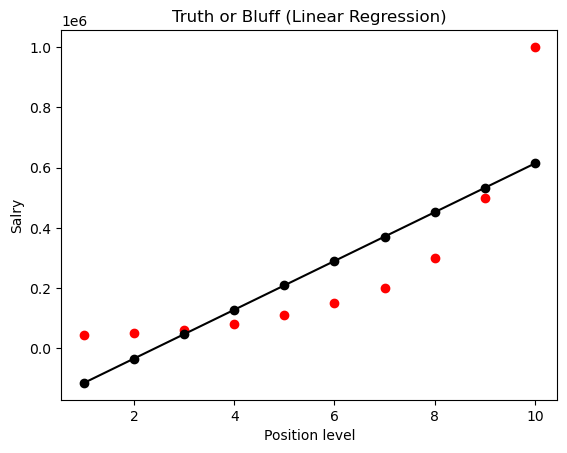

In [11]:
import matplotlib.pyplot as plt

# Visualising the Linear Regression results
plt.scatter(X, y, color='red', label='')
plt.plot(X, y_pred, color="black", label='', marker='o')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel('Position level')
plt.ylabel('Salry')
plt.show()

In [12]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [13]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [14]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)
poly_r2score = poly_model.score(X_poly, y)

In [15]:
poly_r2score

0.9812097727913366

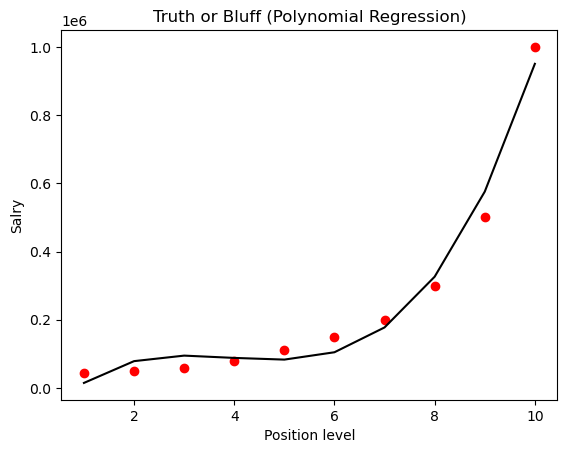

In [16]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color='red', label='')
plt.plot(X, y_pred_poly, color="black", label='')
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel('Position level')
plt.ylabel('Salry')
plt.show()

In [17]:
# Visualising the Polynomial Regression results 
# (for higher resolution and smoother curve)

x_grid = np.arange(X.min(), X.max(), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)

In [18]:
x_grid.shape

(90, 1)

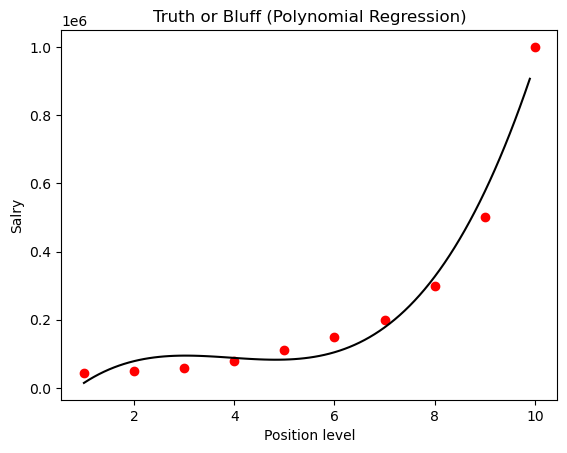

In [19]:
plt.scatter(X, y, color='red')
plt.plot(x_grid, poly_model.predict(poly.fit_transform(x_grid)), color="black")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel('Position level')
plt.ylabel('Salry')
plt.show()

Position level: 6.5

Predicting a new result with <b>Linear Regression</b>

In [20]:
model.predict([[6.5]])  # Salary

array([330378.78787879])

Predicting a new result with <b>Polynomial Regression</b>

In [21]:
poly_model.predict(poly.fit_transform([[6.5]]))  # Salary

array([133259.46969697])

### Scikit-Learn 

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score 

In [23]:
# load data into a pandas dataframe
data = pd.read_csv('position_salaries.csv')

In [24]:
# separate the feature and the target variable
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [25]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [26]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [27]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]], dtype=int64)

In [29]:
y_train

array([  45000,  300000,   60000, 1000000,  110000,   80000,  200000],
      dtype=int64)

In [30]:
# create a polynomial feature object of degree 2
poly = PolynomialFeatures(degree=2)

In [31]:
# fit and transform the training data into polynomial features
X_train_poly = poly.fit_transform(X_train)

In [32]:
X_train_poly

array([[  1.,   1.,   1.],
       [  1.,   8.,  64.],
       [  1.,   3.,   9.],
       [  1.,  10., 100.],
       [  1.,   5.,  25.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.]])

In [33]:
# create a linear regression object
regressor = LinearRegression()

In [34]:
# fit the polynomial features to the linear regression model
regressor.fit(X_train_poly, y_train)

LinearRegression()

In [35]:
# transform the testing data into polynomial features
X_test_poly = poly.transform(X_test)

In [36]:
X_test_poly

array([[ 1.,  9., 81.],
       [ 1.,  2.,  4.],
       [ 1.,  6., 36.]])

In [37]:
# make predictions using the polynomial regression model
y_pred = regressor.predict(X_test_poly)

In [38]:
# evaluate the model using various metrics
print('R^2 score:', r2_score(y_test, y_pred))

R^2 score: 0.7896604512664294


In [39]:
# create a pipeline for polynomial regression with preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

In [40]:
# set the hyperparameters to search over
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [41]:
# perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('regressor', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [42]:
# Note: The R^2 score is not well-defined due to the low number of samples.
# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='r2')

In [43]:
# print the best hyperparameters and the corresponding score
# print('Best score:', grid_search.best_score_)
print('Best parameters:', grid_search.best_params_)

Best parameters: {'poly__degree': 6}


In [44]:
# evaluate the model using the best hyperparameters
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_train, y_train)
y_pred = best_regressor.predict(X_test)

In [45]:
# The mean_squared_errorr and 2_score are still calculated in the same way as before

In [46]:
print('R^2 score:', r2_score(y_test, y_pred))

R^2 score: 0.9958043368443747


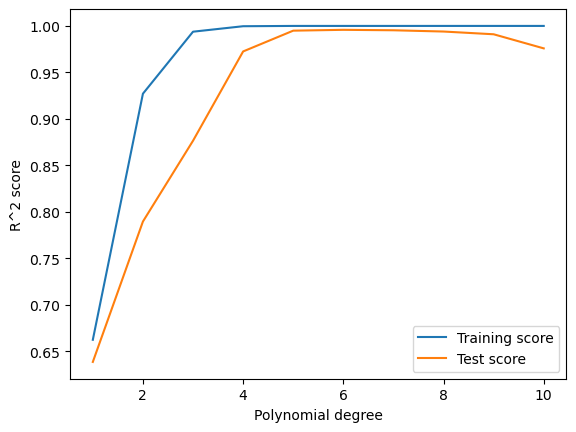

In [47]:
# create a list of polynomial degrees to test
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# create lists to store the training and test scores for each degree
train_scores = []
test_scores = []

# iterate over each degree
for degree in degrees:
    # create a polynomial features object with the current degree
    poly = PolynomialFeatures(degree=degree)
    
    # create a pipeline with the polynomial features object and a linear regression object
    pipeline = make_pipeline(poly, LinearRegression())

    # fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # calculate the R^2 score for the training data
    train_score = pipeline.score(X_train, y_train)
    train_scores.append(train_score)
    
    # calculate the R^2 score for the test data
    test_score = pipeline.score(X_test, y_test)
    test_scores.append(test_score)
    
    y_pred = pipeline.predict(X_test)

# plot the training and test scores as a function of the polynomial degree
plt.plot(degrees, train_scores, label='Training score')
plt.plot(degrees, test_scores, label='Test score')
plt.xlabel('Polynomial degree')
plt.ylabel('R^2 score')
plt.legend()
plt.show()

Linear regression and Nonlinear regression are two types of algorithms used in machine learning for regression tasks. Here are some commonly used algorithms in each category:

<b>Linear Regression</b>:

- Ordinary least squares (OLS) regression
- Ridge regression
- Lasso regression
- Elastic Net regression
- Polynomial regression
- Bayesian regression
- Stochastic gradient descent regression (SGD)

<b>Nonlinear Regression</b>:

- K-nearest neighbors (KNN) regression
- Support vector regression (SVR)
- Decision tree regression
- Random forest regression
- Gradient boosting regression
- Artificial neural network (ANN) regression

### Happy Learning :)